In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv1D, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv("/content/gdrive/MyDrive/prices-split-adjusted.csv")

In [4]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
print(len(data))

851264


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


In [9]:
data

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [10]:
data['symbol'].unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [11]:
specific_rows = ['GOOGL',
                'NVDA',
                'IBM',
                'PYPL',
                'UPS']

In [12]:
df1 = data[data['symbol'].isin(specific_rows)]
df1.reset_index(drop=True, inplace=True)
df1['month'] = pd.DatetimeIndex(df1.date).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df1

,date,symbol,open,close,low,high,volume,month
0,2010-01-04,GOOGL,313.788792,313.688694,312.432438,315.070073,3908400.0,1
1,2010-01-04,IBM,131.179993,132.449997,130.850006,132.970001,6155300.0,1
2,2010-01-04,NVDA,18.510000,18.490000,18.110001,18.620001,20005100.0,1
3,2010-01-04,UPS,58.180000,58.180000,57.980000,58.820000,3897200.0,1
4,2010-01-05,GOOGL,313.903904,312.307316,311.081089,314.234226,6003300.0,1
...,...,...,...,...,...,...,...,...
7421,2016-12-30,GOOGL,803.210022,792.450012,789.619995,803.289978,1728300.0,12
7422,2016-12-30,IBM,166.440002,165.990005,165.500000,166.699997,2952800.0,12
7423,2016-12-30,NVDA,111.349998,106.739998,106.300003,111.919998,30246000.0,12
7424,2016-12-30,PYPL,39.959999,39.470001,39.340000,40.070000,5007500.0,12


In [14]:
def choose_month(df, month):
    df = df[(df.month == month)]
    df.reset_index(drop=True, inplace=True)
    return df
df2 = choose_month(df1, 7)

In [15]:
df2['symbol'].unique()

array(['GOOGL', 'IBM', 'NVDA', 'UPS', 'PYPL'], dtype=object)

In [16]:
df2

,date,symbol,open,close,low,high,volume,month
0,2010-07-01,GOOGL,222.867877,219.964968,217.032031,224.424426,7020100.0,7
1,2010-07-01,IBM,123.550003,122.570000,121.610001,124.209999,9742100.0,7
2,2010-07-01,NVDA,10.240000,10.380000,9.930000,10.450000,18425200.0,7
3,2010-07-01,UPS,57.459999,58.000000,56.869999,58.139999,6305900.0,7
4,2010-07-02,GOOGL,221.031039,218.493503,218.218219,221.361361,3868100.0,7
...,...,...,...,...,...,...,...,...
627,2016-07-29,GOOGL,797.710022,791.340027,790.000000,803.940002,5090500.0,7
628,2016-07-29,IBM,161.360001,160.619995,160.029999,161.669998,3547500.0,7
629,2016-07-29,NVDA,56.389999,57.099998,55.380001,57.250000,10239700.0,7
630,2016-07-29,PYPL,37.410000,37.240002,36.860001,37.480000,6841500.0,7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


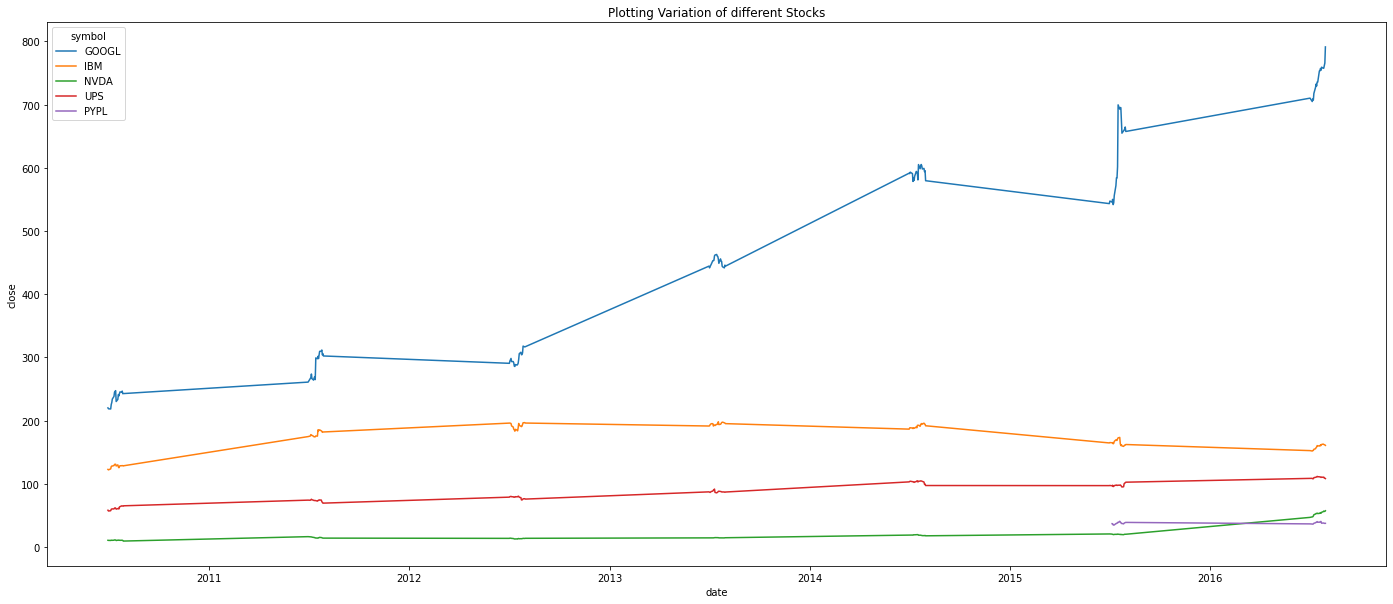

In [17]:
plt.figure(figsize=(24,10))
plt.title('Plotting Variation of different Stocks')
sns.lineplot(df2.date, df2.close, hue=df2.symbol);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


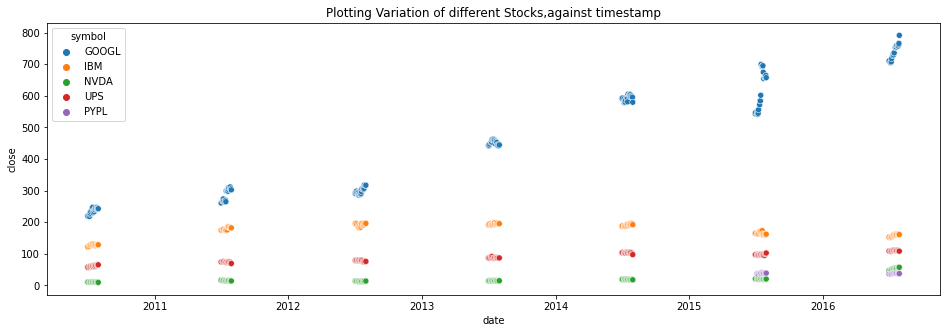

In [18]:
plt.figure(figsize=(16,5))
plt.title('Plotting Variation of different Stocks,against timestamp')
sns.scatterplot(df2.date, df2.close, hue=df2['symbol']);

In [19]:
specific_coloumns=['date','open','high','low','close','volume','month']

In [20]:
def call_this_stock(df, symbol): 

    temp_df = df1[(df1.symbol == symbol)]
    particular_stock = temp_df[specific_coloumns].copy()
    particular_stock.reset_index(drop=True, inplace=True)
    return particular_stock

def timestamp_as_index(df):
    temp = df
    temp = temp.set_index('date', inplace=False)
    return temp

In [21]:
google = call_this_stock(data, 'GOOGL')
google_time = timestamp_as_index(google)

In [22]:

google

,date,open,high,low,close,volume,month
0,2010-01-04,313.788792,315.070073,312.432438,313.688694,3908400.0,1
1,2010-01-05,313.903904,314.234226,311.081089,312.307316,6003300.0,1
2,2010-01-06,313.243260,313.243260,303.483494,304.434452,7949400.0,1
3,2010-01-07,305.005009,305.305302,296.621617,297.347355,12815700.0,1
4,2010-01-08,296.296299,301.926945,294.849857,301.311314,9439100.0,1
...,...,...,...,...,...,...,...
1757,2016-12-23,808.010010,810.969971,805.109985,807.799988,764100.0,12
1758,2016-12-27,808.679993,816.000000,805.799988,809.929993,974400.0,12
1759,2016-12-28,813.330017,813.330017,802.440002,804.570007,1199700.0,12
1760,2016-12-29,802.330017,805.750000,798.140015,802.880005,1056500.0,12


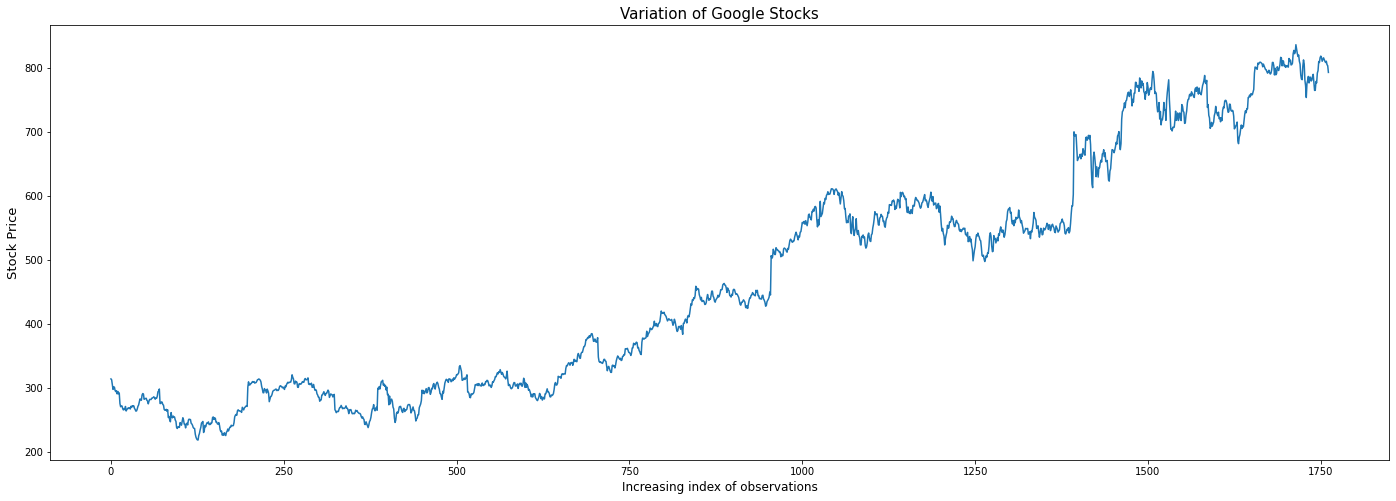

In [23]:
plt.figure(figsize=(24,8))
plt.title('Variation of Google Stocks', fontsize= 15)
plt.ylabel('Stock Price', fontsize=13)
plt.xlabel('Increasing index of observations', fontsize=12)
plt.plot(google.close);

In [24]:
google_time

,open,high,low,close,volume,month
date,,,,,,
2010-01-04,313.788792,315.070073,312.432438,313.688694,3908400.0,1
2010-01-05,313.903904,314.234226,311.081089,312.307316,6003300.0,1
2010-01-06,313.243260,313.243260,303.483494,304.434452,7949400.0,1
2010-01-07,305.005009,305.305302,296.621617,297.347355,12815700.0,1
2010-01-08,296.296299,301.926945,294.849857,301.311314,9439100.0,1
...,...,...,...,...,...,...
2016-12-23,808.010010,810.969971,805.109985,807.799988,764100.0,12
2016-12-27,808.679993,816.000000,805.799988,809.929993,974400.0,12
2016-12-28,813.330017,813.330017,802.440002,804.570007,1199700.0,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


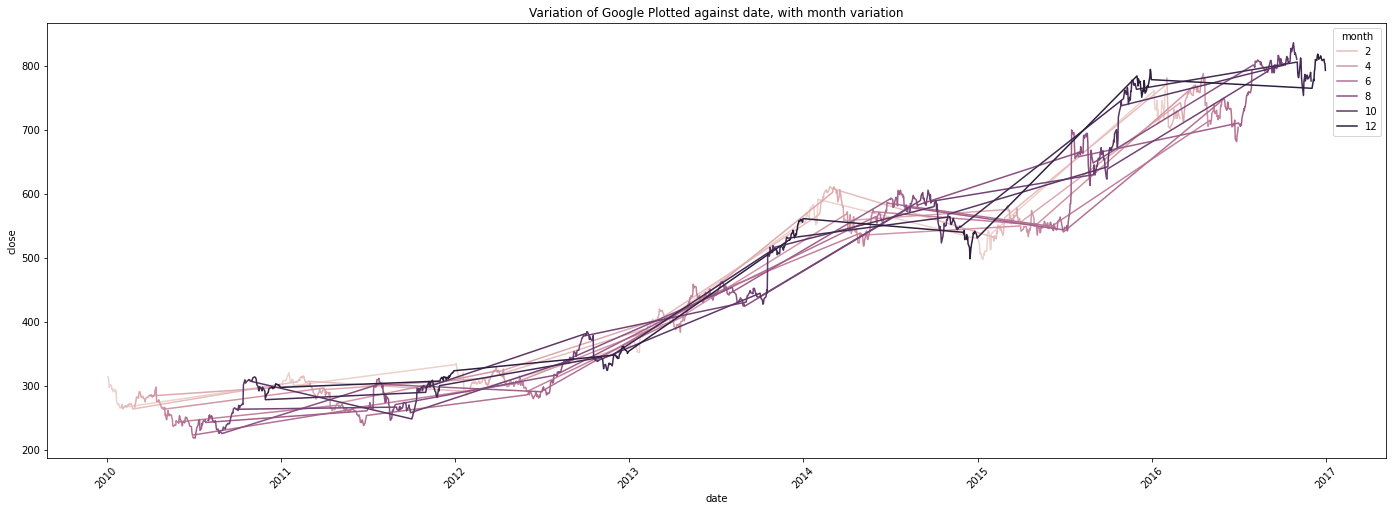

In [25]:
plt.figure(figsize=(24,8))
plt.title('Variation of Google Plotted against date, with month variation')
plt.xticks(rotation = 45)
sns.lineplot(google_time.index, y= google_time.close, hue=google_time.month);

In [26]:
paypal = call_this_stock(df1, 'PYPL')

In [27]:
paypal

,date,open,high,low,close,volume,month
0,2015-07-06,38.000000,39.750000,36.000000,36.709999,5866600.0,7
1,2015-07-07,37.720001,37.810001,36.000000,36.619999,7359000.0,7
2,2015-07-08,36.340000,36.360001,34.529999,34.700001,5387700.0,7
3,2015-07-09,35.099998,35.520000,33.990002,34.500000,3760100.0,7
4,2015-07-10,34.660000,35.189999,33.980000,34.689999,4472800.0,7
...,...,...,...,...,...,...,...
373,2016-12-23,39.820000,39.869999,39.480000,39.580002,3378100.0,12
374,2016-12-27,39.500000,40.080002,39.430000,39.720001,2660100.0,12
375,2016-12-28,39.759998,40.029999,39.529999,39.570000,3237100.0,12
376,2016-12-29,39.540001,40.169998,39.540001,39.959999,3694600.0,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


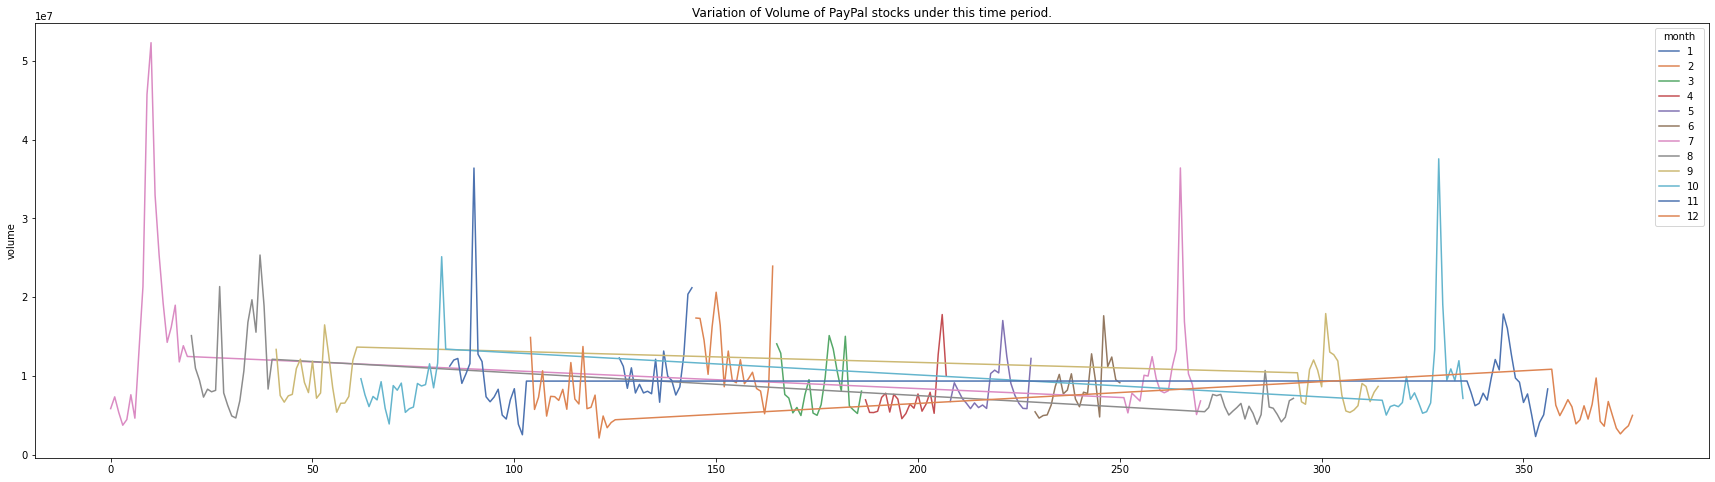

In [28]:
plt.figure(figsize=(30,8))
plt.title('Variation of Volume of PayPal stocks under this time period.')
sns.lineplot(paypal.index, y= paypal.volume, hue=paypal.month, palette="deep");

## Autocorrelation Plot

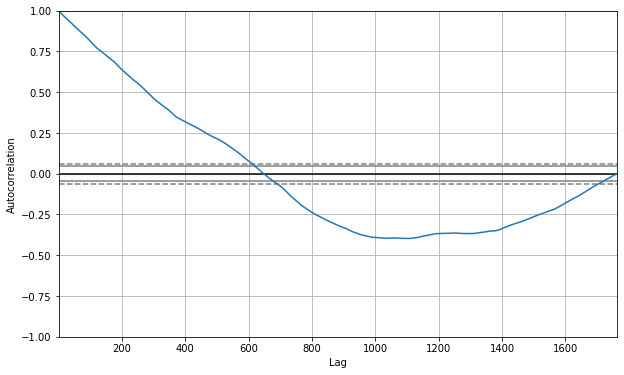

In [29]:
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(google['close']);

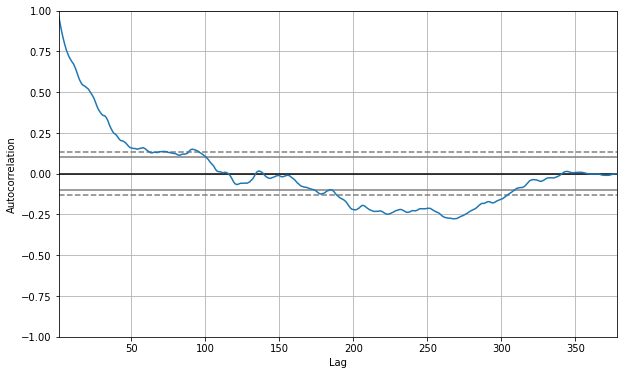

In [30]:
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(paypal['close']);

In [31]:
df3 = df1.reset_index()['close']

In [32]:
df3.shape

(7426,)

In [33]:
df3

0       313.688694
1       132.449997
2        18.490000
3        58.180000
4       312.307316
           ...    
7421    792.450012
7422    165.990005
7423    106.739998
7424     39.470001
7425    114.639999
Name: close, Length: 7426, dtype: float64

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
df3 = scaler.fit_transform(np.array(df3).reshape(-1,1))

In [35]:
df3

array([[0.36863399],
       [0.14944489],
       [0.01162228],
       ...,
       [0.11835135],
       [0.03699538],
       [0.12790557]])

In [36]:
training_size = int(len(df3)*0.65)
test_size = len(df3)-training_size
train_data,test_data = df3[0:training_size,:], df3[training_size:len(df3),:1]

In [37]:
training_size, test_size

(4826, 2600)

In [38]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [40]:
print(X_train.shape), print(y_train.shape)

(4725, 100)
(4725,)


(None, None)

In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
74/74 [==============================] - 23s 308ms/step - loss: 3.7902e-05 - val_loss: 0.0900
Epoch 2/100
74/74 [==============================] - 15s 206ms/step - loss: 3.5779e-05 - val_loss: 0.0875
Epoch 3/100
74/74 [==============================] - 15s 207ms/step - loss: 3.2710e-05 - val_loss: 0.0919
Epoch 4/100
74/74 [==============================] - 15s 206ms/step - loss: 4.6387e-05 - val_loss: 0.0957
Epoch 5/100
74/74 [==============================] - 15s 206ms/step - loss: 3.7178e-05 - val_loss: 0.0880
Epoch 6/100
74/74 [==============================] - 15s 206ms/step - loss: 3.5059e-05 - val_loss: 0.0932
Epoch 7/100
74/74 [==============================] - 16s 214ms/step - loss: 3.4583e-05 - val_loss: 0.0924
Epoch 8/100
74/74 [==============================] - 15s 207ms/step - loss: 3.7588e-05 - val_loss: 0.0941
Epoch 9/100
74/74 [==============================] - 15s 206ms/step - loss: 3.9368e-05 - val_loss: 0.0909
Epoch 10/100
74/74 [==========================

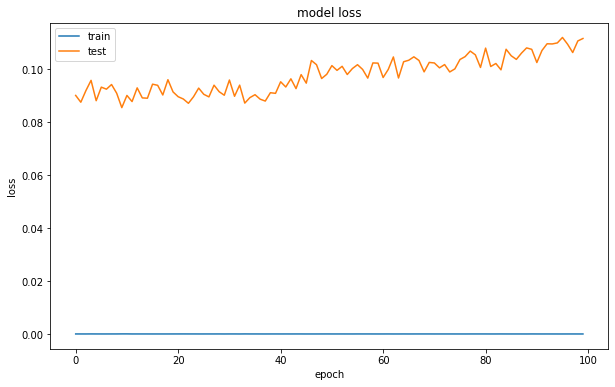

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [49]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

215.40272989778455

In [51]:
math.sqrt(mean_squared_error(y_test,test_predict))

385.45938323848515

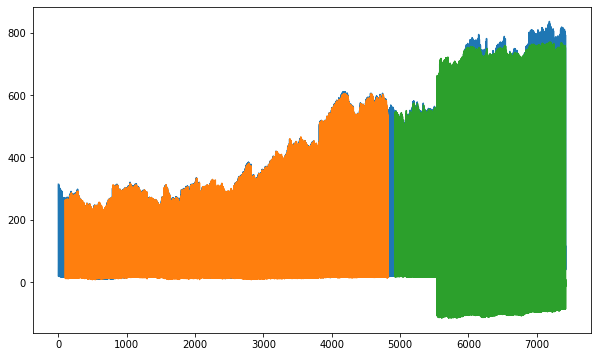

In [60]:
look_back=100
trainPredictPlot = np.empty_like(df3)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df3)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df3))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

##CNN-LSTM Model

In [55]:
cnn_model = Sequential()
cnn_model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape))))
cnn_model.add(TimeDistributed(MaxPooling1D(2)))
cnn_model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
cnn_model.add(TimeDistributed(MaxPooling1D(2)))
cnn_model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
cnn_model.add(TimeDistributed(MaxPooling1D(2)))
cnn_model.add(TimeDistributed(Flatten()))

# LSTM layers
cnn_model.add(Bidirectional(LSTM(100, return_sequences=True)))
cnn_model.add(Dropout(0.5))
cnn_model.add(Bidirectional(LSTM(100, return_sequences=False)))
cnn_model.add(Dropout(0.5))

#Final layers
cnn_model.add(Dense(1, activation='linear'))
cnn_model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [57]:
history2 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
119/119 [==============================] - 29s 243ms/step - loss: 4.7214e-05 - val_loss: 0.1058
Epoch 2/40
119/119 [==============================] - 20s 170ms/step - loss: 4.1699e-05 - val_loss: 0.1045
Epoch 3/40
119/119 [==============================] - 20s 171ms/step - loss: 3.6923e-05 - val_loss: 0.1023
Epoch 4/40
119/119 [==============================] - 21s 175ms/step - loss: 3.9217e-05 - val_loss: 0.1035
Epoch 5/40
119/119 [==============================] - 20s 171ms/step - loss: 3.1441e-05 - val_loss: 0.1009
Epoch 6/40
119/119 [==============================] - 20s 170ms/step - loss: 3.8200e-05 - val_loss: 0.1047
Epoch 7/40
119/119 [==============================] - 21s 180ms/step - loss: 3.3044e-05 - val_loss: 0.1065
Epoch 8/40
119/119 [==============================] - 20s 172ms/step - loss: 4.2689e-05 - val_loss: 0.1034
Epoch 9/40
119/119 [==============================] - 20s 170ms/step - loss: 4.2878e-05 - val_loss: 0.0940
Epoch 10/40
119/119 [================

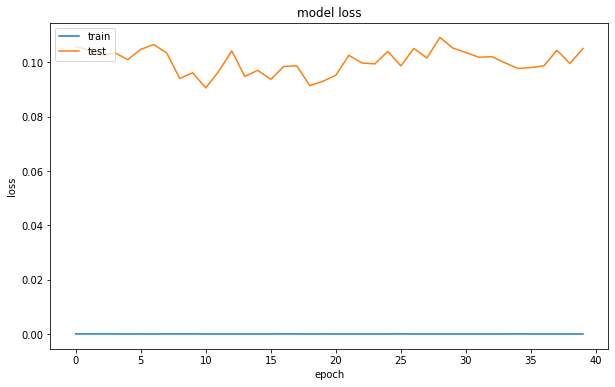

In [59]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()